# Assumptions of Logistic regression 
1. Target variable has to be a binary, multinomial. 
2. All the observation has to be independent of each other. 
3. All the independent variables requires a no or little multicollinearity. 
4. Variables has to be higher, to achieve a higher accuracy. 

# Types of logistic regression 
1. Binary Logistic --> Default or Non-Default, Spam or Ham email
2. Multinomial Logisctis --> Personal, Priority, Advertisement. Normal, subclininal and clinincal 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('weatherAUS.csv') 
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


# Exploratory Data Analysis

In [3]:
df.shape

(232832, 24)

In [4]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [5]:
df.drop(['RISK_MM'], axis=1, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232832 entries, 0 to 232831
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           232832 non-null  object 
 1   Location       232832 non-null  object 
 2   MinTemp        228841 non-null  float64
 3   MaxTemp        228986 non-null  float64
 4   Rainfall       225837 non-null  float64
 5   Evaporation    105140 non-null  float64
 6   Sunshine       95501 non-null   float64
 7   WindGustDir    215476 non-null  object 
 8   WindGustSpeed  215585 non-null  float64
 9   WindDir9am     214591 non-null  object 
 10  WindDir3pm     222783 non-null  object 
 11  WindSpeed9am   228218 non-null  float64
 12  WindSpeed3pm   224343 non-null  float64
 13  Humidity9am    227376 non-null  float64
 14  Humidity3pm    223007 non-null  float64
 15  Pressure9am    207097 non-null  float64
 16  Pressure3pm    207120 non-null  float64
 17  Cloud9am       130487 non-nul

In [7]:
categorical = [var for var in df.columns if df[var].dtype=='O'] 
print(len(categorical)) 
print(categorical)

7
['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [8]:
df[categorical].head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No


## Explore the categorical variables

In [9]:
df[categorical].isnull().sum()

Date                0
Location            0
WindGustDir     17356
WindDir9am      18241
WindDir3pm      10049
RainToday        6995
RainTomorrow     6995
dtype: int64

In [10]:
cat1 = [var for var in categorical if df[var].isnull().sum()!=0] 
cat1

['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']

In [11]:
for i in cat1: 
    print(df[i].value_counts())

W      15775
SE     14984
E      14772
S      14474
WSW    14374
SSW    14331
SSE    14251
N      14239
SW     14083
ENE    13178
WNW    13151
NW     12813
ESE    12202
NE     11646
NNE    10610
NNW    10593
Name: WindGustDir, dtype: int64
N      18069
SE     14958
E      14883
SSE    14591
S      13686
NW     13505
SW     13379
W      13201
NNE    12940
ESE    12790
ENE    12629
NNW    12451
SSW    12224
WNW    12155
NE     12120
WSW    11010
Name: WindDir9am, dtype: int64
SE     16747
W      15917
S      15379
WSW    15131
SW     14439
SSE    14431
WNW    14190
N      13769
ESE    13723
NW     13424
SSW    13323
E      13301
NE     13267
ENE    12622
NNW    12283
NNE    10837
Name: WindDir3pm, dtype: int64
No     175449
Yes     50388
Name: RainToday, dtype: int64
No     175446
Yes     50391
Name: RainTomorrow, dtype: int64


In [12]:
# Check cardinality of my categorical variable 
for var in cat1: 
    print(var, ' contains', len(df[var].unique()), 'labels')

WindGustDir  contains 17 labels
WindDir9am  contains 17 labels
WindDir3pm  contains 17 labels
RainToday  contains 3 labels
RainTomorrow  contains 3 labels


### Feature Engineering of my Date column

In [13]:
df['Date'].dtypes

dtype('O')

In [14]:
df['Date'] = pd.to_datetime(df['Date'])

In [15]:
df['Date'].dtypes

dtype('<M8[ns]')

In [16]:
df['Date']

0        2008-12-01
1        2008-12-02
2        2008-12-03
3        2008-12-04
4        2008-12-05
            ...    
232827   2023-07-26
232828   2023-07-27
232829   2023-07-28
232830   2023-07-29
232831   2023-07-30
Name: Date, Length: 232832, dtype: datetime64[ns]

In [17]:
df['Year'] = df['Date'].dt.year 

In [18]:
df['Year'].head()

0    2008
1    2008
2    2008
3    2008
4    2008
Name: Year, dtype: int64

In [19]:
df['Month'] = df['Date'].dt.month
df['Month'].head()

0    12
1    12
2    12
3    12
4    12
Name: Month, dtype: int64

In [20]:
df['Day'] = df['Date'].dt.day
df['Day'].head()

0    1
1    2
2    3
3    4
4    5
Name: Day, dtype: int64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232832 entries, 0 to 232831
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           232832 non-null  datetime64[ns]
 1   Location       232832 non-null  object        
 2   MinTemp        228841 non-null  float64       
 3   MaxTemp        228986 non-null  float64       
 4   Rainfall       225837 non-null  float64       
 5   Evaporation    105140 non-null  float64       
 6   Sunshine       95501 non-null   float64       
 7   WindGustDir    215476 non-null  object        
 8   WindGustSpeed  215585 non-null  float64       
 9   WindDir9am     214591 non-null  object        
 10  WindDir3pm     222783 non-null  object        
 11  WindSpeed9am   228218 non-null  float64       
 12  WindSpeed3pm   224343 non-null  float64       
 13  Humidity9am    227376 non-null  float64       
 14  Humidity3pm    223007 non-null  float64       
 15  

In [22]:
df.drop('Date', axis=1, inplace=True)

### Explore the Location Variable

In [23]:
df.Location.unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [24]:
df.Location.value_counts()

Canberra            5263
Sydney              5171
Darwin              5020
Melbourne           5020
Brisbane            5020
Hobart              5020
Perth               5019
GoldCoast           4867
AliceSprings        4867
Townsville          4867
Wollongong          4867
Albury              4867
Launceston          4867
Cairns              4867
Penrith             4866
Albany              4866
Tuggeranong         4866
MountGambier        4866
Ballarat            4865
Bendigo             4858
MountGinini         4855
WaggaWagga          4836
Moree               4836
Dartmoor            4836
SydneyAirport       4836
NorfolkIsland       4836
Cobar               4836
Richmond            4836
Williamtown         4836
Portland            4836
Sale                4836
Mildura             4836
CoffsHarbour        4836
Watsonia            4836
Woomera             4836
MelbourneAirport    4836
PerthAirport        4835
PearceRAAF          4835
Nuriootpa           4835
Walpole             4832


In [25]:
# we will do the one hot encoding 
# get k-1 dummy variables after one hot encoding  
pd.get_dummies(df.Location, drop_first=True, dummy_na=True).head()

,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,...,Tuggeranong,Uluru,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera,NaN
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
pd.get_dummies(df.WindGustDir, drop_first=True, dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [27]:
pd.get_dummies(df.WindDir9am, drop_first=True, dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [28]:
pd.get_dummies(df.WindDir3pm, drop_first=True, dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [29]:
pd.get_dummies(df.RainToday, drop_first=True, dummy_na=True).head()

,Yes,NaN
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [30]:
# We Need to explore the numerical Variable 

# This is your homework 

In [31]:
df['RainTomorrow'] = df['RainTomorrow'].fillna('Yes')

In [32]:
# Declaring Target Vector  

X = df.drop(['RainTomorrow'], axis=1) 
y = df['RainTomorrow']

In [33]:
# Split data into train test and split 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [34]:
# Feature Engineering

In [35]:
numer = [col for col in X_train.columns if X_train[col].dtypes != 'O']

In [36]:
for df1 in [X_train, X_test]: 
    for col in numer: 
        col_median = X_train[col].median() 
        df1[col].fillna(col_median, inplace=True)

In [37]:
X_train[numer].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64

In [38]:
for df2 in [X_train, X_test]:
    df2['WindGustDir'].fillna(X_train['WindGustDir'].mode()[0], inplace=True)
    df2['WindDir9am'].fillna(X_train['WindDir9am'].mode()[0], inplace=True)
    df2['WindDir3pm'].fillna(X_train['WindDir3pm'].mode()[0], inplace=True)
    df2['RainToday'].fillna(X_train['RainToday'].mode()[0], inplace=True)

In [39]:
X_train[['WindGustDir','WindDir9am', 'WindDir3pm', 'RainToday']].isnull().sum()

WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

In [40]:
X_train.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
Year             0
Month            0
Day              0
dtype: int64

In [41]:
def max_values(df3, variable, top): 
    return np.where(df3[variable] > top, top, df3[variable]) 

for df3 in [X_train, X_test]: 
    df3['Rainfall'] = max_values(df3, 'Rainfall', 3.2)
    df3['Evaporation'] = max_values(df3, 'Evaporation', 21.8)
    df3['WindSpeed9am'] = max_values(df3, 'WindSpeed9am', 55)
    df3['WindSpeed3pm'] = max_values(df3, 'WindSpeed3pm', 57)

In [42]:
X_train.Rainfall.max()

3.2

In [43]:
X_train[numer].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
count,186265.000000,186265.000000,186265.000000,186265.000000,186265.000000,186265.000000,186265.000000,186265.000000,186265.000000,186265.000000,186265.000000,186265.000000,186265.000000,186265.000000,186265.000000,186265.000000,186265.000000,186265.000000,186265.000000
mean,12.018355,23.115617,0.664825,5.075843,8.135996,39.891101,13.996231,18.475108,69.165640,51.580522,1017.642365,1015.206677,5.269138,4.831192,16.834426,21.586361,2015.809052,6.482350,15.718197
std,6.361106,7.065960,1.179157,2.499222,2.457778,13.004731,8.755285,8.520435,19.212599,20.600593,6.680156,6.637729,2.262347,2.024865,6.461761,6.856343,4.398405,3.415262,8.799713
min,-8.500000,-4.100000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,1.000000,0.000000,978.600000,972.000000,0.000000,0.000000,-6.200000,-5.100000,2007.000000,1.000000,1.000000
25%,7.500000,17.900000,0.000000,4.800000,8.500000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.600000,1011.000000,5.000000,5.000000,12.200000,16.700000,2012.000000,4.000000,8.000000
50%,11.800000,22.500000,0.000000,4.800000,8.500000,39.000000,13.000000,17.000000,70.000000,52.000000,1017.600000,1015.100000,6.000000,5.000000,16.600000,21.000000,2015.000000,6.000000,16.000000
75%,16.600000,28.000000,0.600000,4.800000,8.500000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,6.000000,6.000000,21.300000,26.100000,2020.000000,9.000000,23.000000
max,32.800000,48.100000,3.200000,21.800000,14.500000,135.000000,55.000000,57.000000,100.000000,100.000000,1041.100000,1040.100000,9.000000,9.000000,40.200000,47.200000,2023.000000,12.000000,31.000000


In [44]:
X_train[['WindGustDir','WindDir9am', 'WindDir3pm', 'RainToday']].head()

,WindGustDir,WindDir9am,WindDir3pm,RainToday
178611,SSW,SSW,SW,No
106771,N,NNE,N,No
80461,NW,ENE,WNW,No
202218,SE,NE,SSE,No
101466,W,N,SE,No


In [45]:
! pip install category-encoders

In [46]:
import category_encoders as ce 

encoder = ce.BinaryEncoder(cols=['RainToday']) 
X_train = encoder.fit_transform(X_train)
X_test = encoder.fit_transform(X_test)

In [47]:
X_train

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_0,RainToday_1,Year,Month,Day
178611,Witchcliffe,11.1,22.4,0.0,4.8,8.5,SSW,35.0,SSW,SW,...,1017.3,6.0,5.0,17.7,20.8,0,1,2012,11,14
106771,Melbourne,14.3,28.5,0.0,4.0,8.8,N,41.0,NNE,N,...,1012.8,5.0,1.0,15.2,27.1,0,1,2009,3,18
80461,Tuggeranong,6.3,17.5,0.4,4.8,8.5,NW,30.0,ENE,WNW,...,1013.9,6.0,5.0,10.9,16.5,0,1,2018,8,26
202218,Walpole,13.3,27.2,0.0,4.8,8.5,SE,35.0,NE,SSE,...,1015.5,6.0,5.0,20.3,25.4,0,1,2011,3,14
101466,Sale,16.4,19.5,0.8,4.8,8.5,W,39.0,N,SE,...,1015.1,6.0,5.0,16.9,16.8,0,1,2023,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136767,Brisbane,10.6,21.6,0.2,4.0,6.6,ENE,31.0,WSW,E,...,1028.5,7.0,7.0,15.3,19.7,0,1,2015,7,21
204614,Walpole,15.1,22.5,0.0,4.8,8.5,W,39.0,SE,ESE,...,1024.2,6.0,5.0,19.0,21.4,0,1,2019,2,8
214353,Launceston,8.5,15.5,0.2,4.8,8.5,NNW,50.0,NNW,NNW,...,1015.1,8.0,7.0,11.7,12.8,0,1,2018,9,13
214539,Launceston,11.7,26.1,0.0,4.8,8.5,SE,22.0,ESE,ENE,...,1015.1,6.0,8.0,15.6,24.5,0,1,2019,3,18


In [48]:
X_train = pd.concat([X_train[numer], X_train[['RainToday_0', 'RainToday_1']],
                    pd.get_dummies(X_train.Location),
                    pd.get_dummies(X_train.WindGustDir),
                    pd.get_dummies(X_train.WindDir9am),
                    pd.get_dummies(X_train.WindSpeed3pm)], axis = 1)

In [49]:
X_test = pd.concat([X_test[numer], X_test[['RainToday_0', 'RainToday_1']],
                    pd.get_dummies(X_test.Location),
                    pd.get_dummies(X_test.WindGustDir),
                    pd.get_dummies(X_test.WindDir9am),
                    pd.get_dummies(X_test.WindSpeed3pm)], axis = 1)

In [50]:
X_train.shape

(186265, 134)

In [51]:
# Feature Scaling

In [52]:
cols = X_train.columns

In [53]:
from sklearn.preprocessing import MinMaxScaler 

scaler = MinMaxScaler() 

X_train = scaler.fit_transform(X_train) 
X_test = scaler.fit_transform(X_test)

In [54]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

In [55]:
X_train.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,41.0,43.0,44.0,46.0,48.0,50.0,52.0,54.0,56.0,57.0
count,186265.000000,186265.000000,186265.000000,186265.000000,186265.000000,186265.000000,186265.000000,186265.000000,186265.000000,186265.000000,...,186265.000000,186265.000000,186265.000000,186265.000000,186265.000000,186265.000000,186265.000000,186265.000000,186265.000000,186265.000000
mean,0.496812,0.521372,0.207758,0.232837,0.561103,0.284895,0.254477,0.324125,0.688542,0.515805,...,0.004182,0.003511,0.002287,0.001858,0.001138,0.001127,0.000532,0.000370,0.000301,0.000569
std,0.154022,0.135363,0.368487,0.114643,0.169502,0.097780,0.159187,0.149481,0.194067,0.206006,...,0.064535,0.059151,0.047769,0.043060,0.033718,0.033558,0.023048,0.019243,0.017337,0.023849
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.387409,0.421456,0.000000,0.220183,0.586207,0.218045,0.127273,0.228070,0.565657,0.370000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.491525,0.509579,0.000000,0.220183,0.586207,0.278195,0.236364,0.298246,0.696970,0.520000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.607748,0.614943,0.187500,0.220183,0.586207,0.330827,0.345455,0.421053,0.828283,0.650000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [56]:
list(y_train)

['No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'Yes',
 'No',
 'No',
 'No',
 'Yes',
 'No',
 'No',
 'No',
 'No',
 'Yes',
 'No',
 'Yes',
 'No',
 'No',
 'No',
 'No',
 'Yes',
 'No',
 'No',
 'No',
 'Yes',
 'No',
 'No',
 'No',
 'Yes',
 'No',
 'No',
 'Yes',
 'No',
 'No',
 'Yes',
 'Yes',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'Yes',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'Yes',
 'Yes',
 'No',
 'Yes',
 'No',
 'Yes',
 'Yes',
 'Yes',
 'No',
 'No',
 'Yes',
 'No',
 'No',
 'No',
 'Yes',
 'No',
 'No',
 'No',
 'Yes',
 'No',
 'No',
 'No',
 'No',
 'Yes',
 'No',
 'No',
 'No',
 'No',
 'No',
 'Yes',
 'No',
 'No',
 'No',
 'Yes',
 'No',
 'No',
 'No',
 'No',
 'Yes',
 'Yes',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'Yes',
 'No',
 'Yes',
 'No',
 'No',
 'No',
 'No',
 'Yes',
 'Yes',
 'No',
 'No',
 'Yes',
 'No',
 'Yes',
 'No',
 'No',
 'Yes',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'No',
 'Yes',
 'Yes',
 'Yes',
 'No',

In [57]:
# building Logistic regression model 

from sklearn.linear_model import LogisticRegression 

logreg = LogisticRegression(random_state=11) 

logreg.fit(X_train, y_train)

LogisticRegression(random_state=11)

In [58]:
# Predict 

y_pred_test = logreg.predict(X_test) 
y_pred_test

array(['No', 'No', 'No', ..., 'No', 'Yes', 'No'], dtype=object)

In [59]:
# predict_proba method 

logreg.predict_proba(X_test)[:,1]

array([0.0061506 , 0.03390755, 0.27671024, ..., 0.08876201, 0.55228402,
       0.12606741])

In [60]:
# Lets check the accuracy score

from sklearn.metrics import accuracy_score

print('The Test Accurcy Score ', accuracy_score(y_test, y_pred_test))

The Test Accurcy Score  0.8296433096398738


In [61]:
# Train data 

y_pred_train = logreg.predict(X_train)
y_pred_train

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [62]:
print('The accuracy score os Train Data: ', accuracy_score(y_train, y_pred_train))

The accuracy score os Train Data:  0.8331087429200333


# Confusion Matrix

**True Positive** True Positives occur when we predict an observation belong to a certain class and the observation also belongs to a same class 

**True Negative** If observation does not belong to certain class and the observation actually does not belong to that class. 

**False Positive** When we predict an observation which belong to a certain class and it does not belong to the that class. This type of error we call it as **Type I** error. 

**False Negative** When we predict an observation does not belong to a certain class but the observation actually belongd to that class. This type of error we call it as **Type II** error.

In [63]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test, y_pred_test)
print(cm)

[[32236  2932]
 [ 5001  6398]]


In [64]:
cm_matrix =pd.DataFrame(data = cm, columns=['Actual Positive:1', 'Actual Negative: 0'], 
                       index = ['Predict Positive: 1', 'Predict Negative: 0'])

print(cm_matrix)

                     Actual Positive:1  Actual Negative: 0
Predict Positive: 1              32236                2932
Predict Negative: 0               5001                6398


<AxesSubplot:>

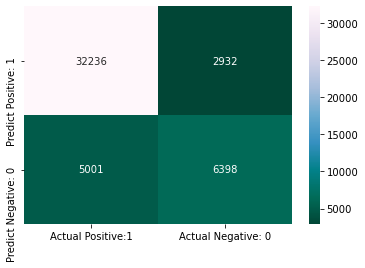

In [65]:
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='PuBuGn_r')

# Classification Report 

We can evaluate the model perfomance, It displays precision, recall, f1-score and Suppoerts.

In [66]:
from sklearn.metrics import classification_report 

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

          No       0.87      0.92      0.89     35168
         Yes       0.69      0.56      0.62     11399

    accuracy                           0.83     46567
   macro avg       0.78      0.74      0.75     46567
weighted avg       0.82      0.83      0.82     46567



# Classification accuracy 

In [84]:
TP = cm[0,0] 
TN = cm[1,1] 
FN = cm[0,1] 
FP = cm[1,0]

In [85]:
# Print the classification accuracy 

class_accuracy = (TP + TN) / float(TP + TN + FP + FN) 

print('The classification Accuracy : {0:0.4f}'.format(class_accuracy))

The classification Accuracy : 0.8296


In [86]:
# Classification error 

class_error = (FP + FN) / float(TP + TN + FP + FN) 

print('classification error: {0:0.4f}'.format(class_error))

classification error: 0.1704


# Precision 

Precision can be defined as the percentage of correctly peredicted positive outcomes out of all the predicted positive outcomes. It can be given as the ratio of True Positives (TP) to the sum of true positive and false positive (TP + FP) 

So, precision identifies the proportion of correctly predicted positive outcomes. It is more concerened with the positive class than negative class 

Mathematically Precision = TP/(TP + FP)

In [87]:
# Print the precision score 

precision = TP / (TP + FP)
print('Precison Score : {0:0.4f}'.format(precision))

Precison Score : 0.8657


# Recall 

Recall can be defined as the percentage of correctly predicted positive outcomes out of all the actual positives outcomes. It can be given as the ratio of true positives to the sum of True positives + False Negatives (TP + FN). Recall is also called sensitivity. 

Recall identifies the proportion of correctly predicted actual positives 

In [88]:
recall = TP / float(TP + FN) 

print('Recall Score : {0:0.4f}'.format(recall))

Recall Score : 0.9166


# True Positive Rate 

TPR = Recall

In [89]:
tpr = TP / float(TP + FN) 

print('Recall Score : {0:0.4f}'.format(tpr))

Recall Score : 0.9166


# Flase positive rate 

In [90]:
fpr = FP/float(FP + TN) 

print('false positive rate : {0:0.4f}'.format(fpr))

false positive rate : 0.4387


# Specificity 

In [91]:
specificity = TN / (TN + FP)
print('specificity : {0:0.4f}'.format(specificity))

specificity : 0.5613


# Adjusting the threshold level 

In [92]:
# printing the first 10 precdictions 

y_pred_prob = logreg.predict_proba(X_test)[0:10] 
y_pred_prob

array([[0.9938494 , 0.0061506 ],
       [0.96609245, 0.03390755],
       [0.72328976, 0.27671024],
       [0.64039418, 0.35960582],
       [0.91679038, 0.08320962],
       [0.10331488, 0.89668512],
       [0.74366326, 0.25633674],
       [0.32458123, 0.67541877],
       [0.26238421, 0.73761579],
       [0.74231284, 0.25768716]])

Threshold is 0.5 

1. (>) 0.5 is rain 
2. < 0.5 is no rain

In [97]:
# Store probabilities in dataframe 

y_pred_prob_df = pd.DataFrame(data = y_pred_prob, columns = ['prob of - No rain (0)', 'Prob of - rain(1)']) 
y_pred_prob_df

,prob of - No rain (0),Prob of - rain(1)
0,0.993849,0.006151
1,0.966092,0.033908
2,0.723290,0.276710
3,0.640394,0.359606
4,0.916790,0.083210
5,0.103315,0.896685
6,0.743663,0.256337
7,0.324581,0.675419
8,0.262384,0.737616
9,0.742313,0.257687


In [98]:
y_pred1 = logreg.predict_proba(X_test)[:,1]

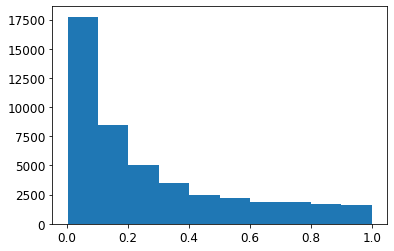

In [100]:
# Plot histogram 

plt.rcParams['font.size'] = 12 

plt.hist(y_pred1, bins = 10) 

plt.show()

# Lower the threshold value 

In [116]:
from sklearn.preprocessing import binarize 

for i in range(1,5): 
    cm1 = 0 
    
    y_pred1 = logreg.predict_proba(X_test)[:,1]
    
    y_pred1 = y_pred1.reshape(-1, 1) # 
    
    y_pred2 = binarize(y_pred1, threshold=i/10) 
    
    y_pred2 = np.where(y_pred2 == 1, "yes", "No") 

    cm1 = confusion_matrix(y_test, y_pred2) 
    
    print ('With',i/10,'threshold the Confusion Matrix is ','\n\n',cm1,'\n\n',
           
            'with',cm1[0,0]+cm1[1,2],'correct predictions, ', '\n\n', 
           
            cm1[0,2],'Type I errors( False Positives), ','\n\n',
           
            cm1[1,0],'Type II errors( False Negatives), ','\n\n',
           
           'Accuracy score: ', (accuracy_score(y_test, y_pred2)), '\n\n',
           
           'Sensitivity: ',cm1[1,2]/(float(cm1[1,2]+cm1[1,0])), '\n\n',
           
           'Specificity: ',cm1[0,0]/(float(cm1[0,0]+cm1[0,2])),'\n\n',
          
            '====================================================', '\n\n')
    

With 0.1 threshold the Confusion Matrix is  

 [[16905     0 18263]
 [  696     0 10703]
 [    0     0     0]] 

 with 27608 correct predictions,  

 18263 Type I errors( False Positives),  

 696 Type II errors( False Negatives),  

 Accuracy score:  0.3630253183584942 

 Sensitivity:  0.9389420124572331 

 Specificity:  0.4806926751592357 



With 0.2 threshold the Confusion Matrix is  

 [[24392     0 10776]
 [ 1759     0  9640]
 [    0     0     0]] 

 with 34032 correct predictions,  

 10776 Type I errors( False Positives),  

 1759 Type II errors( False Negatives),  

 Accuracy score:  0.5238044108488844 

 Sensitivity:  0.84568821826476 

 Specificity:  0.6935850773430391 



With 0.3 threshold the Confusion Matrix is  

 [[28256     0  6912]
 [ 2927     0  8472]
 [    0     0     0]] 

 with 36728 correct predictions,  

 6912 Type I errors( False Positives),  

 2927 Type II errors( False Negatives),  

 Accuracy score:  0.6067816264736831 

 Sensitivity:  0.7432230897447144 

# ROC - AUC

ROC - Curve. ROC curve stands for Receiver Operating Charateristics Curve. An ROC curve is a plot which shows us the perfomance of a classification model at various classification threshold. 

The **ROC Curve** plots the TPR against the FPR at various threshold. 

Text(0, 0.5, 'True Positive Rate')

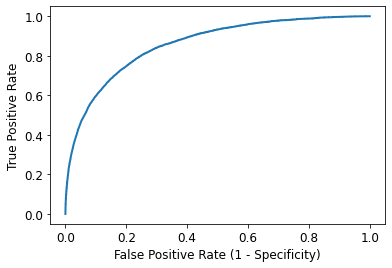

In [120]:
from sklearn.metrics import roc_curve 

fpr, tpr, thresholds = roc_curve(y_test, y_pred1, pos_label='Yes') 

plt.figure(figsize=(6,4)) 

plt.plot(fpr, tpr, linewidth=2) 

plt.xlabel('False Positive Rate (1 - Specificity)') 

plt.ylabel('True Positive Rate')

# Area Under the curve 

A perfect classifier has the area under the curve as 1 

At the area under the curve of 0.5 we will have the random classification 

At < 0.5 wrong classification will happen

In [122]:
from sklearn.metrics import roc_auc_score 

ROC_AUC = roc_auc_score(y_test, y_pred1) 

print('ROC AUC: {:.4f}'. format(ROC_AUC))

ROC AUC: 0.8577


# Comments 

1. ROC - AUC score is a single number summary. The higher the value better the perfomance. 
2. ROC AUC of 1 our classifier is perfect.

# k - Fold cross validation 

In [ ]:
cross validation : 
To find the best parameter of our model. 

In [125]:
help(logreg)

Help on LogisticRegression in module sklearn.linear_model._logistic object:

class LogisticRegression(sklearn.linear_model._base.LinearClassifierMixin, sklearn.linear_model._base.SparseCoefMixin, sklearn.base.BaseEstimator)
 |  LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
 |  
 |  Logistic Regression (aka logit, MaxEnt) classifier.
 |  
 |  In the multiclass case, the training algorithm uses the one-vs-rest (OvR)
 |  scheme if the 'multi_class' option is set to 'ovr', and uses the
 |  cross-entropy loss if the 'multi_class' option is set to 'multinomial'.
 |  (Currently the 'multinomial' option is supported only by the 'lbfgs',
 |  'sag', 'saga' and 'newton-cg' solvers.)
 |  
 |  This class implements regularized logistic regression using the
 |  'liblinear' library, 'newton-cg', '

In [124]:
from sklearn.model_selection import cross_val_score 

scores = cross_val_score(logreg, X_train, y_train, cv = 5, scoring='accuracy') 

print('The cross validation scores:{}'.format(scores))

The cross validation scores:[0.83453682 0.83155719 0.83171825 0.83185247 0.83469788]


In [131]:
# Hyperparameter optimissation using gridsearch CV 

from sklearn.model_selection import GridSearchCV 

params = [{'penalty' : ['l1', 'l2']}, 
         {'C': [0.1, 0.5, 1]}] 

grid_search = GridSearchCV(estimator=logreg,
                          param_grid= params, 
                          scoring='accuracy', 
                          cv = 5, 
                          verbose=0) 

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=11),
             param_grid=[{'penalty': ['l1', 'l2']}, {'C': [0.1, 0.5, 1]}],
             scoring='accuracy')

In [132]:
print('Best Score', grid_search.best_score_)

Best Score 0.8328725203339328


In [133]:
print('Best parameters', grid_search.best_params_)

Best parameters {'penalty': 'l2'}


In [134]:
print('Best Estimators', grid_search.best_estimator_)

Best Estimators LogisticRegression(random_state=11)
